# Imports

In [295]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [296]:
# Create pandas dataframe from csv
df = pd.read_csv("../logs/MainLog-2_05.csv", sep=",", header=0)

# Split  synthetic/complex
df_synthetic = df[df['name'].str.match('synth')]
df_complex = df[~df['name'].str.match('synth')]

# Mean
df_mean_k = df.groupby('k_optimal').mean()
df_synthetic_mean_k = df_synthetic.groupby('k_optimal').mean()
df_complex_mean_k = df_complex.groupby('k_optimal').mean()

# Style plot
plt.style.use('default')
font = {'size' : 20}
plt.rc('font', **font)

# Print results

In [297]:

dfFalse = df[df['verified'] == False]
dfError = dfFalse[dfFalse['millis'] < 180000]
if not dfError.empty:
    print("Error for graphs: " + dfError)

numSynthetic = df_synthetic.shape[0]
dfSyntheticSolved = df_synthetic[df_synthetic['verified'] == True]
numSyntheticSolved = dfSyntheticSolved.shape[0]
print("Synthetic: " + str(numSyntheticSolved) + "/" + str(numSynthetic)
      + " (" + str(numSyntheticSolved / numSynthetic) + "%)")

numComplex = df_complex.shape[0]
dfComplexSolved = df_complex[df_complex['verified'] == True]
numComplexSolved = dfComplexSolved.shape[0]
print("Complex: " + str(numComplexSolved) + "/" + str(numComplex)
      + " (" + str(numComplexSolved / numComplex) + "%)")

numGeneral = df.shape[0]
dfSolved = df[df['verified'] == True]
numSolved = dfSolved.shape[0]
print("Overall: " + str(numSolved) + "/" + str(numGeneral)
      + " (" + str(numSolved / numGeneral) + "%)")

Synthetic: 303/441 (0.6870748299319728%)
Complex: 151/220 (0.6863636363636364%)
Overall: 454/661 (0.686838124054463%)


# Line Plot percentage over time

        k_optimal   k_solved  verified  percentage_solved
millis                                                   
0        4.364341   4.364341       1.0           0.000000
1       12.148148  12.148148       1.0          19.515885
2        9.153846   9.153846       1.0          23.600605
3       14.461538  14.461538       1.0          25.567322
4        7.500000   7.500000       1.0          27.534039
...           ...        ...       ...                ...
136980  37.000000  37.000000       1.0          67.927383
145977  15.000000  15.000000       1.0          68.078669
160318  15.000000  15.000000       1.0          68.229955
175195  14.000000  14.000000       1.0          68.381241
176954  20.000000  20.000000       1.0          68.532526

[221 rows x 4 columns]


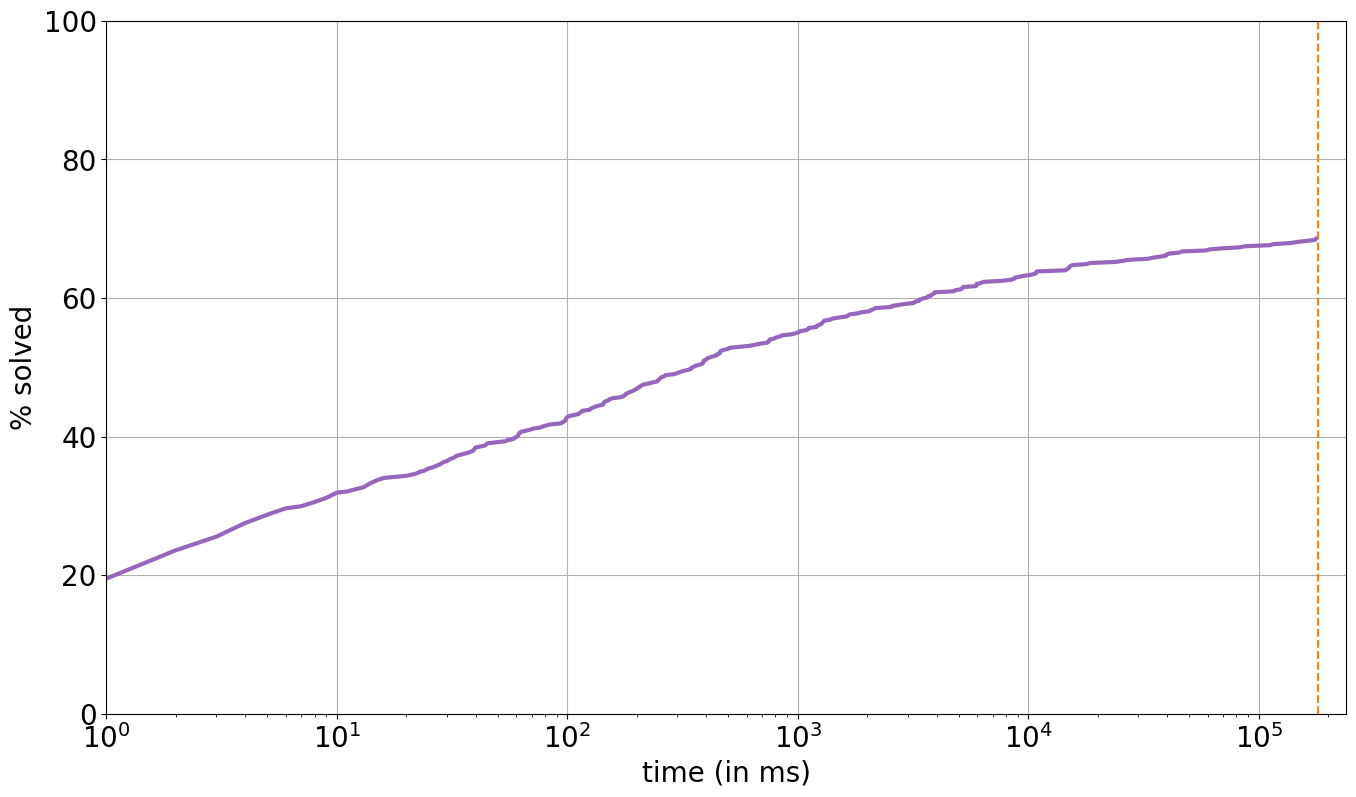

In [317]:
dfPercentage = df[df['millis'] < 180000].groupby('millis').mean()
dfPercentage['percentage_solved'] = 0.0

for index, row in dfPercentage.iterrows():
    dfPercentage.at[index, 'percentage_solved'] = df[df['millis'] < index].shape[0] / df.shape[0] * 100

print(dfPercentage)


plt.figure(figsize=(16,9))
plt.axvline(x=180000, color='tab:orange', linestyle='--')
plt.plot(dfPercentage['percentage_solved'], c='tab:purple', linewidth='3')
plt.xlabel('time (in ms)')
plt.ylabel('% solved')
plt.title('')
plt.ylim([0, 100])
plt.xlim([1, 240000])
plt.gca().set_xscale('log')
plt.grid()
plt.savefig('plots/PercentageLinePlot.png',  bbox_inches='tight')
plt.show()

# Scatter Plot k

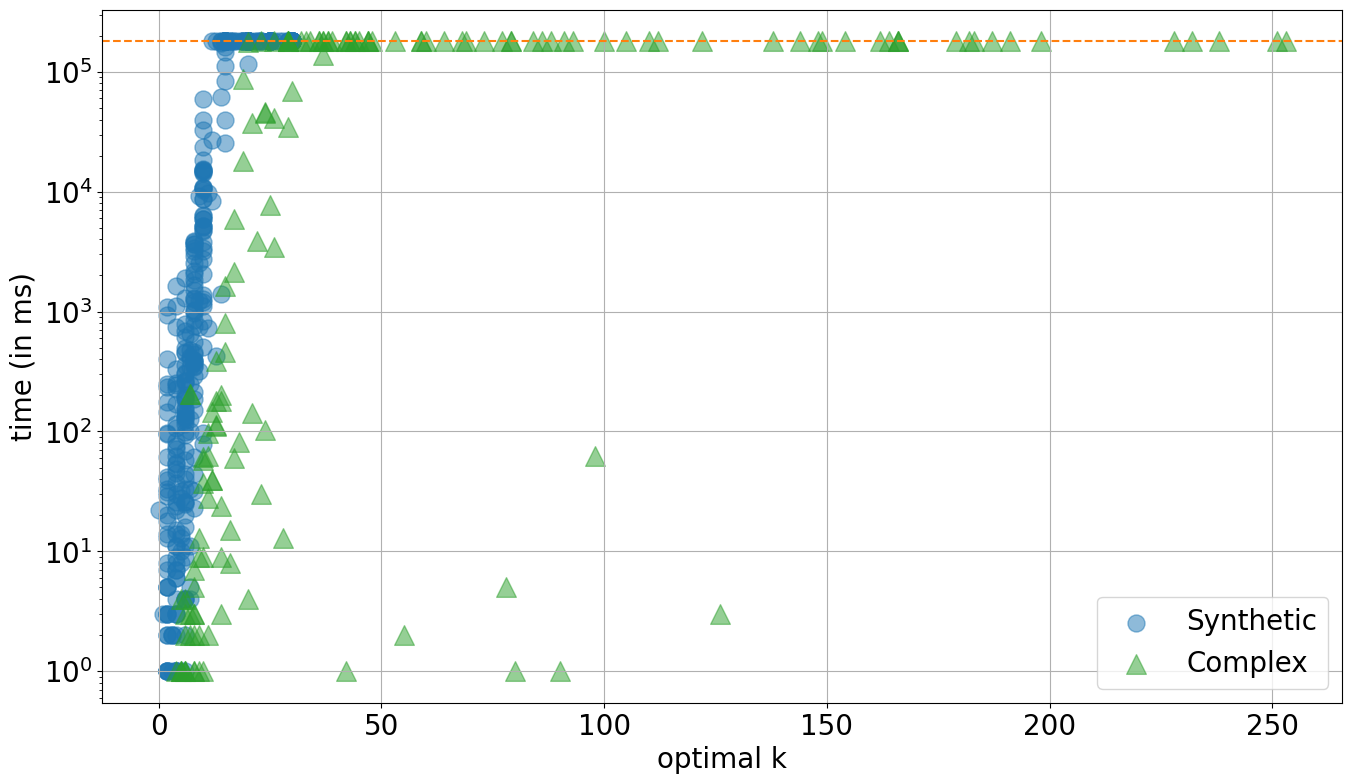

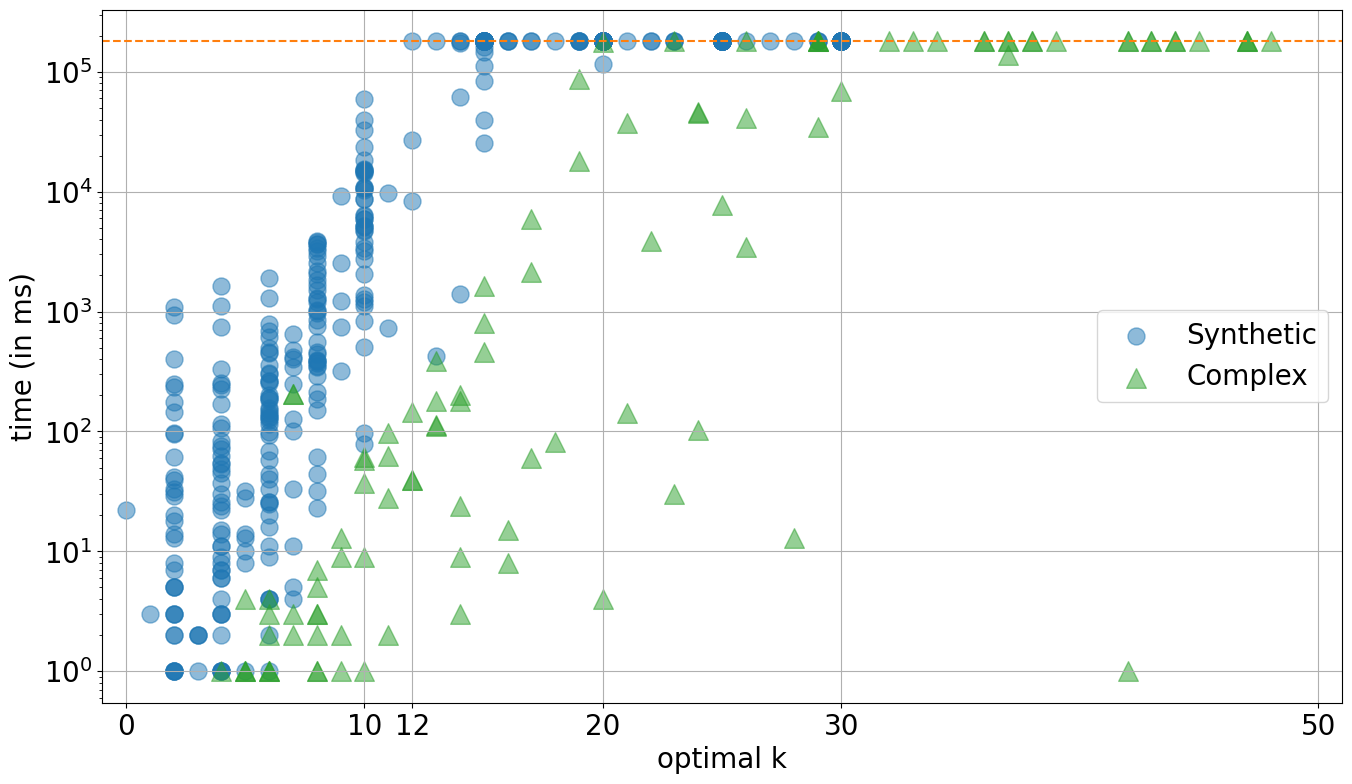

In [335]:
plt.figure(figsize=(16,9))
plt.axhline(y=180000, color='tab:orange', linestyle='--')
plt.scatter(df_synthetic['k_optimal'], df_synthetic['millis'], c='tab:blue', marker='o', alpha=0.5, s=150, label='Synthetic')
plt.scatter(df_complex['k_optimal'], df_complex['millis'], c='tab:green', marker='^', alpha=0.5, s=200, label='Complex')
plt.gca().set_yscale('log')
plt.xlabel('optimal k')
plt.ylabel('time (in ms)')
plt.legend()
plt.grid()
plt.savefig('plots/SyntheticComplexScatterPlot_1.png',  bbox_inches='tight')
plt.show()

plt.figure(figsize=(16,9))
plt.axhline(y=180000, color='tab:orange', linestyle='--')
plt.scatter(df_synthetic['k_optimal'], df_synthetic['millis'], c='tab:blue', marker='o', alpha=0.5, s=150, label='Synthetic')
plt.scatter(df_complex['k_optimal'], df_complex['millis'], c='tab:green', marker='^', alpha=0.5, s=200, label='Complex')
plt.gca().set_yscale('log')
plt.xlabel('optimal k')
plt.ylabel('time (in ms)')
plt.legend()
plt.grid()
plt.xlim([-1, 51])
plt.savefig('plots/SyntheticComplexScatterPlot_2.png',  bbox_inches='tight')
plt.show()